## Markowitz Efficient Frontier

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pf_data = pd.read_csv('Markowitz_Data.csv', index_col='Date')
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


<Axes: xlabel='Date'>

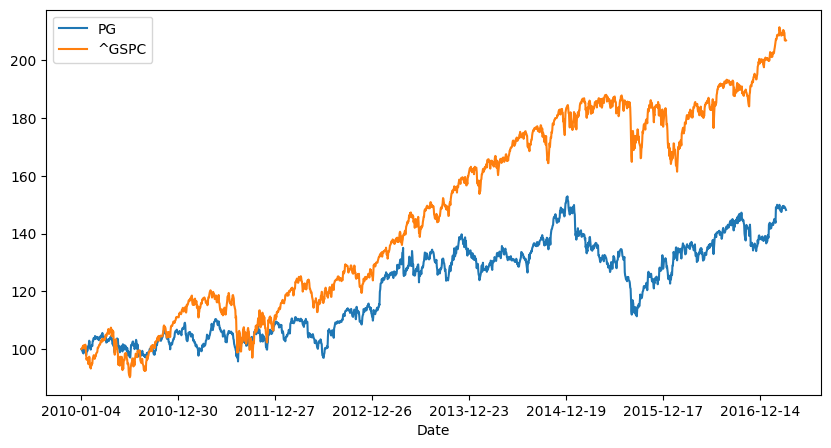

In [4]:
# Normalize and plot of graph:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
#Log returns:
log_returns = np.log(pf_data / pf_data.shift(1))

# Average returns:
log_returns.mean() * 250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [6]:
# Covariance
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [7]:
#Correlation:
log_returns.corr()

# Returns are well-correlated = 0.570 > 0.3 (30%)

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [9]:
# Nunber of assets in Portfolio
assets = ['PG','^GSPC']
num_assets = len(assets)
num_assets

2

In [12]:
## Create two random weights:
weights = np.random.random(num_assets)
weights /= np.sum(weights) # Ensure that all the weights add up to 1.
weights

array([0.59232374, 0.40767626])

In [13]:
weights[0] + weights[1]

1.0

In [16]:
# Expected Portfolio Return:
pfolio_return = np.sum(weights * log_returns.mean()) * 250

# Expected Portfolio Variance:
pfolio_variance = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# Expected Portfolio Volatility:
pfolio_volatility = np.sqrt(pfolio_variance)

print(f"Portfolio Returns: {pfolio_return:.5f}")
print(f"Portfolio Variance: {pfolio_variance:.5f}")
print(f"Portfolio Volatility: {pfolio_volatility:.5f}")

Portfolio Returns: 0.07279
Portfolio Variance: 0.01711
Portfolio Volatility: 0.13079


In [18]:
# 1000 combinations of weights of the same assets:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # Portfolio Returns formula
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

#Convert into arrays:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08068266, 0.06958364, 0.05986436, 0.05425932, 0.0660529 ,
        0.07516769, 0.09100745, 0.07732131, 0.07035572, 0.07258685,
        0.06972838, 0.08041587, 0.08098199, 0.09811502, 0.08253771,
        0.09365463, 0.07810457, 0.06088611, 0.06958924, 0.08980181,
        0.06826504, 0.07781652, 0.09979393, 0.05709573, 0.09984762,
        0.06132209, 0.06472909, 0.09142005, 0.06917712, 0.06600194,
        0.06477705, 0.08536582, 0.07577606, 0.07506447, 0.07671749,
        0.06955452, 0.07769126, 0.06624642, 0.07133526, 0.06933461,
        0.08503881, 0.06820367, 0.06824732, 0.06702423, 0.09276087,
        0.07483674, 0.0748813 , 0.08798947, 0.07363512, 0.09546863,
        0.07916583, 0.06894827, 0.06287566, 0.08777783, 0.08077538,
        0.07177507, 0.08120858, 0.06622485, 0.08503758, 0.07520634,
        0.08152355, 0.06779017, 0.09745588, 0.07664369, 0.07054769,
        0.07812808, 0.07844846, 0.06148914, 0.07482786, 0.08936141,
        0.09308625, 0.06284964, 0.07355956, 0.07

In [19]:
## Plotting on a Efficient Frontier Graph ##

# Create Dataframe:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.080683,0.132544
1,0.069584,0.131296
2,0.059864,0.136990
3,0.054259,0.142893
4,0.066053,0.132655


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Efficient Frontier Curve')

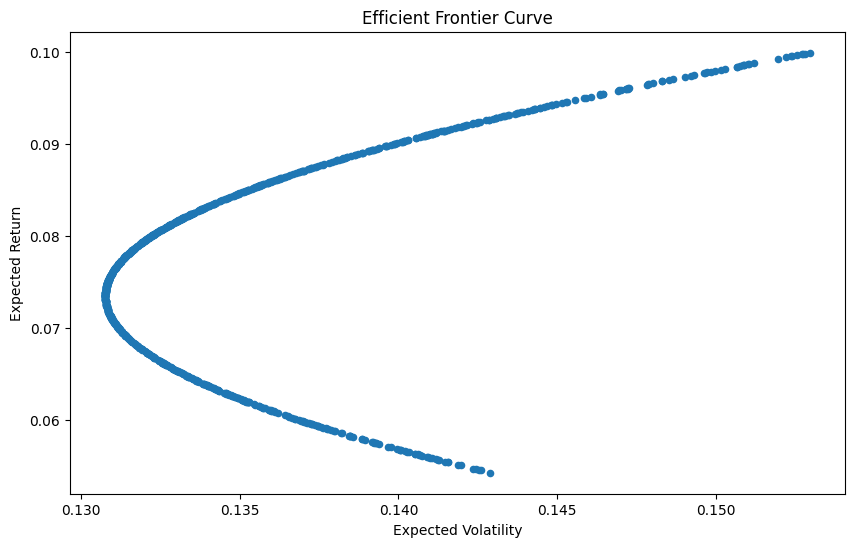

In [20]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title("Efficient Frontier Curve")